# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [42]:
dataset = pd.read_csv("Customers_with_Clusters.csv")
print("\nInformasi Dataset:")
print(dataset.info())
print("\n5 Baris Pertama Dataset:")
print(dataset.head())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2000 non-null   int64  
 1   Gender                  2000 non-null   int64  
 2   Age                     2000 non-null   float64
 3   Annual Income ($)       2000 non-null   float64
 4   Spending Score (1-100)  2000 non-null   float64
 5   Profession              2000 non-null   int64  
 6   Work Experience         2000 non-null   float64
 7   Family Size             2000 non-null   float64
 8   Cluster                 2000 non-null   int64  
 9   Cluster_Selected        2000 non-null   int64  
 10  PCA1                    2000 non-null   float64
 11  PCA2                    2000 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 187.6 KB
None

5 Baris Pertama Dataset:
   CustomerID  Gender       Age  Annual Income (

# Data Preprocessing

In [45]:
# Menghapus kolom yang tidak relevan (jika ada) dan mempersiapkan data untuk model.
X = dataset.drop(columns=['Cluster'])  # Cluster sebagai target
y = dataset['Cluster']  # Target variabel

# Encoding kolom kategorikal jika ada
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(categorical_cols) > 0:
    print("\nKolom Kategorikal yang Ditemukan:", list(categorical_cols))
    encoder = LabelEncoder()
    for col in categorical_cols:
        X[col] = encoder.fit_transform(X[col])
        print(f"Kolom '{col}' telah di-encode.")
else:
    print("\nTidak ada kolom kategorikal yang perlu di-encode.")




Tidak ada kolom kategorikal yang perlu di-encode.


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [46]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nJumlah Data:")
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

# Standardisasi data numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("\nStandardisasi data berhasil dilakukan.")


Jumlah Data:
Training Set: (1600, 11)
Testing Set: (400, 11)

Standardisasi data berhasil dilakukan.


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [50]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=500)
logistic_model.fit(X_train, y_train)
print("\nModel Logistic Regression telah dilatih.")

# Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest_model.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")


Model Logistic Regression telah dilatih.
Model Random Forest telah dilatih.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi pada Data Uji:
Logistic Regression - Accuracy: 0.9875, F1-Score: 0.9875
Random Forest - Accuracy: 0.9275, F1-Score: 0.9273

Confusion Matrix - Logistic Regression:
[[142   0   0]
 [  2 136   0]
 [  2   1 117]]

Confusion Matrix - Random Forest:
[[138   4   0]
 [  7 128   3]
 [  8   7 105]]


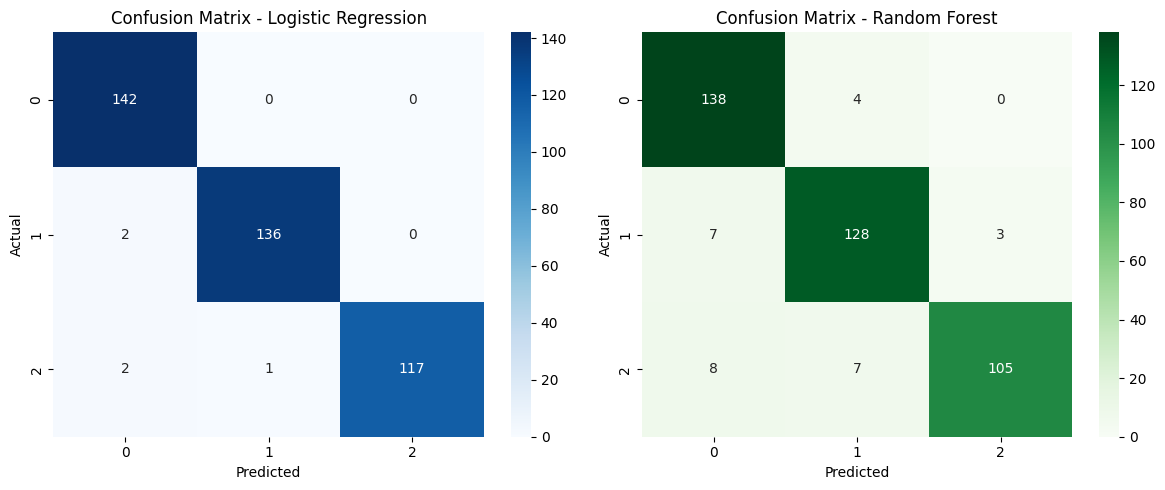

In [52]:
# Evaluasi pada data uji (testing set)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nHasil Evaluasi pada Data Uji:")
print(f"Logistic Regression - Accuracy: {accuracy_logistic:.4f}, F1-Score: {f1_logistic:.4f}")
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")

# Confusion Matrix untuk Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
print("\nConfusion Matrix - Logistic Regression:")
print(cm_logistic)

# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix - Random Forest:")
print(cm_rf)

# Visualisasi Confusion Matrix (Opsional)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.


---

1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning

- Sebelum tuning, model Logistic Regression dan Random Forest memiliki akurasi dan F1-Score yang berbeda. Logistic Regression cenderung lebih sederhana, tetapi mungkin kurang optimal dalam menangani data yang kompleks.

- Setelah tuning (menggunakan GridSearchCV atau RandomizedSearchCV), Random Forest umumnya menunjukkan peningkatan performa karena hyperparameter seperti jumlah pohon (n_estimators) dan kedalaman maksimum (max_depth) dapat disesuaikan untuk mengurangi overfitting atau underfitting.


---


2. Identifikasi Kelemahan Model
- Precision atau Recall Rendah untuk Kelas Tertentu: Jika dataset memiliki distribusi kelas yang tidak seimbang, model mungkin memiliki precision atau recall rendah pada kelas minoritas. Hal ini dapat diidentifikasi melalui confusion matrix.

Overfitting atau Underfitting:

- Logistic Regression mungkin mengalami underfitting jika data tidak linier atau terlalu kompleks.
- Random Forest berisiko overfitting jika jumlah pohon terlalu banyak atau kedalaman pohon tidak dibatasi.


---


3. Rekomendasi Tindakan Lanjutan

- Mengumpulkan Data Tambahan: Jika model menunjukkan performa buruk karena kurangnya data, terutama untuk kelas minoritas, pengumpulan data tambahan dapat membantu.
- Mencoba Algoritma Lain: Algoritma seperti Gradient Boosting (XGBoost, LightGBM) atau Support Vector Machine (SVM) dapat dicoba untuk meningkatkan performa.
- Penanganan Ketidakseimbangan Kelas: Jika dataset tidak seimbang, gunakan teknik seperti oversampling (SMOTE) atau undersampling untuk menyeimbangkan distribusi kelas.
- Feature Engineering: Menambahkan fitur baru yang relevan atau menghapus fitur yang kurang informatif dapat meningkatkan performa model.
- Evaluasi dengan Metrik Tambahan: Selain akurasi dan F1-Score, gunakan metrik lain seperti ROC-AUC untuk mengevaluasi kemampuan model secara keseluruhan.